### <font color='#33BBFF'>Importing Libraries</font>

In [1]:
import nltk
import numpy as np
import pandas as pd
import json
import csv
from nltk.corpus import stopwords
import re
from nltk.util import ngrams
import matplotlib.pyplot as plt
import seaborn as sns
from collections import  Counter
import math
import spacy
from nltk import pos_tag, word_tokenize
from spacy.matcher import Matcher
from textblob import TextBlob
nltk.download('stopwords')
from nltk.corpus import stopwords # We will do some cleanup of the text
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanjanadubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <font color='#33BBFF'>Loading Dataset</font>

In [2]:
movie_lines=open('./cornellcorpus/movie_lines.txt',
           encoding='utf-8',
           errors='ignore').read().split('\n')

In [3]:
movie_conversations=open('./cornellcorpus/movie_conversations.txt',
                   encoding='utf-8',
                   errors='ignore').read().split('\n')

In [5]:
#type(movie_conversations)
print(movie_conversations[:10])

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']", "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']"]


In [6]:
print(movie_lines[:10])

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!', 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!', 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.', 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?', "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.", 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow', "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.", 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No', 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?', 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?']


In [201]:
print(len(movie_conversations))
print(len(movie_lines))

83098
304714


### <font color='#33BBFF'>Extracting Relevant Data</font>

In [4]:
movie_exchange=[]

for i in movie_conversations:
    movie_exchange.append(i.split(' +++$+++ ')[-1][1:-1].replace("'","").replace(",","").split())

In [5]:
movie_exchange[:10] 

[['L194', 'L195', 'L196', 'L197'],
 ['L198', 'L199'],
 ['L200', 'L201', 'L202', 'L203'],
 ['L204', 'L205', 'L206'],
 ['L207', 'L208'],
 ['L271', 'L272', 'L273', 'L274', 'L275'],
 ['L276', 'L277'],
 ['L280', 'L281'],
 ['L363', 'L364'],
 ['L365', 'L366']]

In [6]:
movie_dialogs={}

for line in movie_lines:
    movie_dialogs[line.split(' +++$+++ ')[0]] = line.split(' +++$+++ ')[-1] # key = value

In [7]:
print(len(movie_dialogs))
#print(movie_dialogs)

304714


### <font color='#33BBFF'>Creating Questions Answers List</font>

In [8]:
questions=[]
answers=[]

for conver in movie_exchange:
    for i in range(len(conver)-1):
        
        questions.append(movie_dialogs[conver[i]])
        answers.append(movie_dialogs[conver[i+1]])

In [9]:
questions

['Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.',
 "Well, I thought we'd start with pronunciation, if that's okay with you.",
 'Not the hacking and gagging and spitting part.  Please.',
 "You're asking me out.  That's so cute. What's your name again?",
 "No, no, it's my fault -- we didn't have a proper introduction ---",
 'Cameron.',
 "The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.",
 'Why?',
 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.',
 'Gosh, if only we could find Kat a boyfriend...',
 "C'esc ma tete. This is my head",
 "Right.  See?  You're ready for the quiz.",
 "I don't want to know how to say that though.  I want to know useful things. Like where the good stores are.  How much does champagne cost?  Stuff like Chat.  I have n

In [16]:
answers

["Well, I thought we'd start with pronunciation, if that's okay with you.",
 'Not the hacking and gagging and spitting part.  Please.',
 "Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?",
 'Forget it.',
 'Cameron.',
 "The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.",
 'Seems like she could get a date easy enough...',
 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.',
 "That's a shame.",
 'Let me see what I can do.',
 "Right.  See?  You're ready for the quiz.",
 "I don't want to know how to say that though.  I want to know useful things. Like where the good stores are.  How much does champagne cost?  Stuff like Chat.  I have never in my life had to point out my head to someone.",
 "That's because it's such a nice one.",
 'Forget French.',
 "Well, there's someone I think might be --",
 'Where?',
 "I 

### <font color='#33BBFF'>Pre Processing Questions Answers List</font>

In [17]:
maxLen = 0 
for i in range(len(questions)):
    if (len(questions[i])) > maxLen:
        maxLen = len(questions[i])
        #print(questions[i])

In [18]:
#maxLen
print(len(questions))
print(len(answers))

221616
221616


In [10]:
questions_ = []
answers_ = []

for i in range(len(questions)):
    if len(questions[i]) < 20:  # taking max length as 20 
        questions_.append(questions[i])
        answers_.append(answers[i])
        

In [26]:
#len(questions_)
questions_[:-1]

['Cameron.',
 'Why?',
 'There.',
 'Sure have.',
 "She's not a...",
 'Hi.',
 'You know Chastity?',
 'Have fun tonight?',
 'I was?',
 'Well, no...',
 'But',
 'What crap?',
 'What good stuff?',
 'The "real you".',
 'No',
 'Wow',
 'She okay?',
 'They do to!',
 'No.',
 'Who?',
 'Great',
 'Is he oily or dry?',
 "It's more",
 'Queen Harry?',
 'Neat...',
 'Hey, sweet cheeks.',
 'Hi, Joey.',
 "Where've you been?",
 'What do you think?',
 "What's normal?",
 'Like you care.',
 'What?',
 'Why?',
 'But you hate Joey',
 'You did what?',
 'But',
 "That's not",
 'Let go!',
 'You set me up.',
 'I just wanted --',
 'Daddy, I --',
 'Daddy, no!',
 'Why?',
 'No, but',
 'Never',
 'You the new guy?',
 'So they tell me...',
 'Thirty-two.',
 'Get out!',
 "That I'm used to.",
 'That girl -- I --',
 'Who is she?',
 'Why not?',
 'You know French?',
 'What about him?',
 'Her favorite uncle',
 "He's pretty!",
 'Sure',
 'She kissed me.',
 "What's the worst?",
 'Hey -- do you mind?',
 'Where ya goin?',
 'Away.',
 'Ye

In [14]:
answers_[::1]

["The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.",
 'Unsolved mystery.  She used to be really popular when she started high school, then it was just like she got sick of it or something.',
 'Where?',
 "I really, really, really wanna go, but I can't.  Not unless my sister goes.",
 "Lesbian?  No. I found a picture of Jared Leto in one of her drawers, so I'm pretty sure she's not harboring same-sex tendencies.",
 'Looks like things worked out tonight, huh?',
 'I believe we share an art instructor',
 'Tons',
 "You never wanted to go out with 'me, did you?",
 "Then that's all you had to say.",
 'You always been this selfish?',
 "Me.  This endless ...blonde babble. I'm like, boring myself.",
 'The "real you".',
 'Like my fear of wearing pastels?',
 "Okay -- you're gonna need to learn how to lie.",
 "Let's go.",
 'I hope so.',
 'They do not!',
 'You might wanna think about it',
 'Joey.',
 'Would you mind getting me

In [12]:
# lab code + stack overflow


my_stops = stopwords.words('english') # What's this?
stop_pat = r'\b(?:{})\b'.format('|'.join(my_stops))

def preprocessing_text(txt):
    
    # turns all alphabetic letters into their lowercase forms.
    txt = txt.lower()
    
    # for puntuation marks
    txt = re.sub(r"[^\w\s]", "", txt) 
    
    # cleaning shortcut words..
    txt = re.sub(r"\'ll", " will", txt)
    txt = re.sub(r"\'ve", " have", txt)
    txt = re.sub(r"\'re", " are", txt)
    txt = re.sub(r"\'d", " would", txt)
    txt = re.sub(r"won't", "will not", txt)
    txt = re.sub(r"can't", "can not", txt)
    txt = re.sub(r"i'm", "i am", txt)
    txt = re.sub(r"he's", "he is", txt)
    txt = re.sub(r"she's", "she is", txt)
    txt = re.sub(r"that's", "that is", txt)
    txt = re.sub(r"what's", "what is", txt)
    txt = re.sub(r"where's", "where is", txt)
    txt = re.sub(r"lol", "laughing out loud", txt)
    txt = re.sub(r"asap", "as soon as possible", txt)
    
    # Substitute anything in the stop-pat, which is a list of all the stopwords with '', removing it.
    txt = re.sub(stop_pat, '', txt)
    
    return txt

In [15]:
questions = []

for line in questions_:
    questions.append(preprocessing_text(line))

In [16]:
answers = []

for line in answers_:
    answers.append(preprocessing_text(line))

In [17]:
print(len(questions))
print(len(answers))

58949
58949


In [27]:
answers[:10]

['the thing is cameron  im at the mercy of a particularly hideous breed of loser  my sister  i cant date until she does',
 'unsolved mystery  she used to be really popular when she started high school then it was just like she got sick of it or something',
 'where',
 'i really really really wanna go but i cant  not unless my sister goes',
 'lesbian  no i found a picture of jared leto in one of her drawers so im pretty sure shes not harboring samesex tendencies',
 'looks like things worked out tonight huh',
 'i believe we share an art instructor',
 'tons',
 'you never wanted to go out with me did you',
 'then thats all you had to say']

In [28]:
for i in range(len(answers)):
    answers[i] = ' '.join(answers[i].split()[:18])

In [32]:
answers[10:20]

['you always been this selfish',
 'me this endless blonde babble im like boring myself',
 'the real you',
 'like my fear of wearing pastels',
 'okay youre gonna need to learn how to lie',
 'lets go',
 'i hope so',
 'they do not',
 'you might wanna think about it',
 'joey']

### <font color='#33BBFF'>Dataset Analysis</font>

In [ ]:
df_answers = pd.DataFrame(answers, columns=['answers'])
df_questions = pd.DataFrame(questions, columns=['questions'])

In [ ]:
nlp = spacy.load("en_core_web_sm")


my_lists_q = [ [] for x in range(0,len(df_questions['questions']))]


for i in range(0,len(df_questions['questions'])):
    text = df_questions['questions'][i]
    doc = nlp(text)
    my_lists_q[i].append(doc)
    
    
my_lists_a = [ [] for x in range(0,len(df_answers['answers']))]


for i in range(0,len(df_answers['answers'])):
    text = df_answers['answers'][i]
    doc = nlp(text)
    my_lists_a[i].append(doc)

In [ ]:
import itertools

for i in range(0,len(df_questions['questions'])):
    k = my_lists_q[i]
    k.sort()
    my_lists_q[i] = list(k for k,_ in itertools.groupby(k))
    
for i in range(0,len(df_answers['answers'])):
    k = my_lists_a[i]
    k.sort()
    my_lists_a[i] = list(k for k,_ in itertools.groupby(k))

In [ ]:
my_lists_a = [x for x in my_lists_a if x]
my_lists_q = [x for x in my_lists_q if x]

#### <font color='#006400'>Top 10 Adjectives (Answers List)</font>

In [177]:
from collections import Counter
adjective_tokens = []

for i in range(0,len(my_lists_a)):
    #print(my_lists[i])
    for j in range(len(my_lists_a[i])): 
        for token in my_lists_a[i][j]:
            if (not token.is_stop and not token.is_punct and token.pos_ == "ADJ"):
             adjective_tokens.append(token.text)

        
adj_freq = Counter(adjective_tokens)
most = adj_freq.most_common(10) 

<AxesSubplot:>

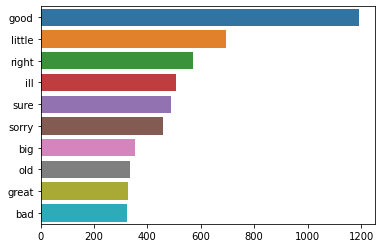

In [178]:
x, y= [], []
for word,count in most:
#    if (word not in stop):
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

#### <font color='#006400'>Top 10 Adjectives (Questions List)</font>

In [179]:
from collections import Counter
adjective_tokens = []

for i in range(0,len(my_lists_q)):
    #print(my_lists[i])
    for j in range(len(my_lists_q[i])): 
        for token in my_lists_q[i][j]:
            if (not token.is_stop and not token.is_punct and token.pos_ == "ADJ"):
             adjective_tokens.append(token.text)

        
adj_freq = Counter(adjective_tokens)
most = adj_freq.most_common(10) 

<AxesSubplot:>

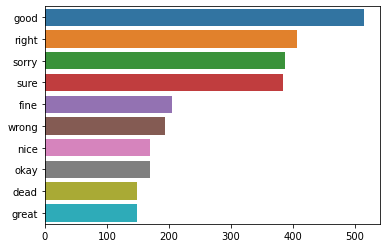

In [180]:
x, y= [], []
for word,count in most:
#    if (word not in stop):
    x.append(word)
    y.append(count)
        
sns.barplot(x=y,y=x)

#### <font color='#006400'>Word Cloud for Top Nouns (Answers List)</font>

In [193]:
from collections import Counter
noun_tokens = []

for i in range(0,len(my_lists_a)):
    #print(my_lists[i])
    for j in range(len(my_lists_a[i])): 
        for token in my_lists_a[i][j]:
            if (not token.is_stop and not token.is_punct and token.pos_ == "NOUN"):
             noun_tokens.append(token.text)

        
noun_freq = Counter(noun_tokens)
most = noun_freq.most_common(10) 

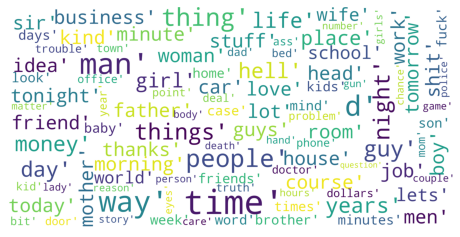

In [194]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))



wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    max_font_size=30,
    scale=10,
    random_state=1)
   
wordcloud=wordcloud.generate(str(noun_tokens))


fig = plt.figure(1, figsize=(8, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

#### <font color='#006400'>Word Cloud for Top Nouns (Questions List)</font>

In [195]:
from collections import Counter
noun_tokens = []

for i in range(0,len(my_lists_q)):
    #print(my_lists[i])
    for j in range(len(my_lists_q[i])): 
        for token in my_lists_q[i][j]:
            if (not token.is_stop and not token.is_punct and token.pos_ == "NOUN"):
             noun_tokens.append(token.text)

        
noun_freq = Counter(noun_tokens)
most = noun_freq.most_common(10) 

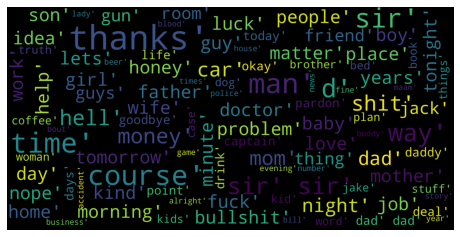

In [198]:
from nltk.corpus import stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))



wordcloud = WordCloud(
    background_color='black',
    stopwords=stopwords,
    max_words=100,
    max_font_size=30,
    scale=10,
    random_state=1)
   
wordcloud=wordcloud.generate(str(noun_tokens))


fig = plt.figure(1, figsize=(8, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### <font color='#33BBFF'>Creating a Subset of Questions - Answers Dataset</font>

In [37]:
subset_answers=answers[:55000]
subset_questions=questions[:55000]

In [40]:
print(len(subset_answers))
print(len(subset_questions))

55000
55000


In [46]:
subset_questions[51:60]

['who is she',
 'why not',
 'you know french',
 'what about him',
 'her favorite uncle',
 'hes pretty',
 'sure',
 'she kissed me',
 'whats the worst']

In [48]:
subset_answers[51:60]

['bianca stratford sophomore dont even think about it',
 'i could start with your haircut but it doesnt matter shes not allowed to date until her older',
 'sure do my moms from canada',
 'you wanna go out with him',
 'dead at fortyone',
 'okay i wasnt sure',
 'then go get her',
 'where',
 'you get the girl']

### <font color='#33BBFF'>Creating Vocabulary</font>

In [49]:
word_dict = {}

In [50]:
for line in subset_questions:
    for word in line.split():
        if word not in word_dict:
            word_dict[word] = 1 # if word not present, assign 1
        else:
            word_dict[word] += 1 # else increase the count for the word

In [52]:
for line in subset_answers:
    for word in line.split():
        if word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1

In [ ]:
## since the model was crashing with a large vocab size, I tried to reduce the vocab even more.
## we will no longer considere 'rare' words or words that occur less than 3 times in the whole corpus..

In [59]:
rare_word_threshhold = 3
vocab = {}
word_number = 0


for word, count in word_dict.items():
    if count >= rare_word_threshhold:
        vocab[word] = word_number
        word_number += 1

In [60]:
len(vocab)

8831

In [61]:
vocab

{'cameron': 0,
 'why': 1,
 'there': 2,
 'sure': 3,
 'have': 4,
 'shes': 5,
 'not': 6,
 'a': 7,
 'hi': 8,
 'you': 9,
 'know': 10,
 'fun': 11,
 'tonight': 12,
 'i': 13,
 'was': 14,
 'well': 15,
 'no': 16,
 'but': 17,
 'what': 18,
 'crap': 19,
 'good': 20,
 'stuff': 21,
 'the': 22,
 'real': 23,
 'wow': 24,
 'she': 25,
 'okay': 26,
 'they': 27,
 'do': 28,
 'to': 29,
 'who': 30,
 'great': 31,
 'is': 32,
 'he': 33,
 'or': 34,
 'dry': 35,
 'its': 36,
 'more': 37,
 'queen': 38,
 'harry': 39,
 'neat': 40,
 'hey': 41,
 'sweet': 42,
 'cheeks': 43,
 'joey': 44,
 'whereve': 45,
 'been': 46,
 'think': 47,
 'whats': 48,
 'normal': 49,
 'like': 50,
 'care': 51,
 'hate': 52,
 'did': 53,
 'thats': 54,
 'let': 55,
 'go': 56,
 'set': 57,
 'me': 58,
 'up': 59,
 'just': 60,
 'wanted': 61,
 'daddy': 62,
 'never': 63,
 'new': 64,
 'guy': 65,
 'so': 66,
 'tell': 67,
 'thirtytwo': 68,
 'get': 69,
 'out': 70,
 'that': 71,
 'im': 72,
 'used': 73,
 'girl': 74,
 'french': 75,
 'about': 76,
 'him': 77,
 'her': 78,
 

### <font color='#33BBFF'>Adding SOS and EOS</font>

In [62]:
for i in range(len(subset_answers)):
    subset_answers[i] = '<SOS> ' + subset_answers[i] + ' <EOS>'

In [63]:
subset_answers

['<SOS> the thing is cameron im at the mercy of a particularly hideous breed of loser my sister i <EOS>',
 '<SOS> unsolved mystery she used to be really popular when she started high school then it was just like <EOS>',
 '<SOS> where <EOS>',
 '<SOS> i really really really wanna go but i cant not unless my sister goes <EOS>',
 '<SOS> lesbian no i found a picture of jared leto in one of her drawers so im pretty sure <EOS>',
 '<SOS> looks like things worked out tonight huh <EOS>',
 '<SOS> i believe we share an art instructor <EOS>',
 '<SOS> tons <EOS>',
 '<SOS> you never wanted to go out with me did you <EOS>',
 '<SOS> then thats all you had to say <EOS>',
 '<SOS> you always been this selfish <EOS>',
 '<SOS> me this endless blonde babble im like boring myself <EOS>',
 '<SOS> the real you <EOS>',
 '<SOS> like my fear of wearing pastels <EOS>',
 '<SOS> okay youre gonna need to learn how to lie <EOS>',
 '<SOS> lets go <EOS>',
 '<SOS> i hope so <EOS>',
 '<SOS> they do not <EOS>',
 '<SOS> you 

In [ ]:
## apart from the vocab words, we also need to represent these special tokens
## SOS is the start of the sentence
## EOS is end of sentence
## OUT if for those words that are not present in our vocabulary 
## PAD is used to make the balance the input size 

In [64]:
tokens = ['<SOS>', '<EOS>', '<OUT>', '<PAD>']

In [66]:
#len(vocab)
value = len(vocab)
for token in tokens:
    vocab[token] = value
    value += 1

In [68]:
vocab['<PAD>']

8834

In [70]:
vocab['<PAD>']=0

### <font color='#33BBFF'>Creating Inverse Dictionary</font>

In [72]:
inverse_vocab = {w:v for v, w in vocab.items()}

In [77]:
inverse_vocab[0]

'<PAD>'

### <font color='#33BBFF'>Creating Encoder Input</font>

In [74]:
encoder_input = []

for line in subset_questions:
    list_ = []
    for word in line.split():
        if word not in vocab:
            list_.append(vocab['<OUT>'])
        else:
            list_.append(vocab[word])
        
    encoder_input.append(list_)

In [79]:
encoder_input[51:60]

[[30, 32, 25],
 [1, 6],
 [9, 10, 75],
 [18, 76, 77],
 [78, 79, 80],
 [81, 82],
 [3],
 [25, 83, 58],
 [48, 22, 84]]

### <font color='#33BBFF'>Creating Decoder Input</font>

In [80]:
decoder_input = []

for line in subset_answers:
    list_ = []
    for word in line.split():
        if word not in vocab:
            list_.append(vocab['<OUT>'])
        else:
            list_.append(vocab[word])        
    decoder_input.append(list_)

In [81]:
print(len(decoder_input))
print(len(encoder_input))

## should be same as the subset 55,000

55000
55000


In [82]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [83]:
encoder_input = pad_sequences(encoder_input, 20, padding='post', truncating='post')
decoder_input = pad_sequences(decoder_input, 20, padding='post', truncating='post')

In [84]:
len(encoder_input[0])

20

In [106]:
print(encoder_input[500]) # questions
print(decoder_input[500]) # answers

[ 72   6 201   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[8831    1    6 8832    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]


### <font color='#33BBFF'>Creating Decoder Output</font>

In [107]:
# code taken from stackoverflow

decoder_final_output = []

for i in decoder_input:
    decoder_final_output.append(i[1:]) 

decoder_final_output = pad_sequences(decoder_final_output, 20, padding='post', truncating='post')

In [108]:
decoder_final_output

array([[  22,  404,   32, ...,   13, 8832,    0],
       [8833, 2313,   25, ...,   50, 8832,    0],
       [  86, 8832,    0, ...,    0,    0,    0],
       ...,
       [  13,    4,   29, ...,    0,    0,    0],
       [ 524,   13,  372, ...,    0,    0,    0],
       [  18,  108,   93, ...,    0,    0,    0]], dtype=int32)

In [109]:
from tensorflow.keras.utils import to_categorical
decoder_final_output = to_categorical(decoder_final_output, len(vocab))

In [110]:
decoder_final_output[1]

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### <font color='#33BBFF'>Creating Model</font>

In [111]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input

In [112]:
enc_inp = Input(shape=(20, ))
dec_inp = Input(shape=(20, ))

In [113]:
vocab_len = len(vocab)

embed = Embedding(vocab_len+1, output_dim=50, 
                  input_length=20,
                  trainable=True                  
                  )

In [114]:
# code for building the LSTM model is taken from stackoverflow

In [ ]:
## LSTM Input Encoder Layer

In [115]:
enc_embed = embed(enc_inp)
enc_lstm = LSTM(400, return_sequences=True, return_state=True)
enc_op, h, c = enc_lstm(enc_embed)
enc_states = [h, c]

In [ ]:
## LSTM Input decoder layer

In [116]:
dec_embed = embed(dec_inp)
dec_lstm = LSTM(400, return_sequences=True, return_state=True)
dec_op, _, _ = dec_lstm(dec_embed, initial_state=enc_states)

In [ ]:
## Model Building

In [117]:
dense = Dense(vocab_len, activation='softmax')
dense_op = dense(dec_op)
model = Model([enc_inp, dec_inp], dense_op)

In [ ]:
## Model Compiling

In [118]:
model.compile(loss='categorical_crossentropy',
              metrics=['acc'],
              optimizer='adam')

In [ ]:
# Model Training

In [120]:
model.fit([encoder_input, decoder_input],decoder_final_output,epochs=50)

Epoch 1/50
1719/1719 [==============================] - 361s 210ms/step - loss: 2.5272 - acc: 0.6103
Epoch 2/50
1719/1719 [==============================] - 438s 255ms/step - loss: 2.2974 - acc: 0.6275
Epoch 3/50
1719/1719 [==============================] - 420s 244ms/step - loss: 2.2032 - acc: 0.6334
Epoch 4/50
1719/1719 [==============================] - 361s 210ms/step - loss: 2.1362 - acc: 0.6371
Epoch 5/50
1719/1719 [==============================] - 359s 209ms/step - loss: 2.0796 - acc: 0.6398
Epoch 6/50
1719/1719 [==============================] - 358s 208ms/step - loss: 2.0241 - acc: 0.6421
Epoch 7/50
1719/1719 [==============================] - 359s 209ms/step - loss: 1.9695 - acc: 0.6442
Epoch 8/50
1719/1719 [==============================] - 363s 211ms/step - loss: 1.9154 - acc: 0.6463
Epoch 9/50
1719/1719 [==============================] - 359s 209ms/step - loss: 1.8631 - acc: 0.6488
Epoch 10/50
1719/1719 [==============================] - 372s 216ms/step - loss: 1.8132 - a

### <font color='#33BBFF'>Creating Inference Model</font>

In [176]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [121]:
enc_model = Model([enc_inp], enc_states)

In [122]:
# decoder Model

## code taken from stackoverflow

decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]


decoder_outputs, state_h, state_c = dec_lstm(dec_embed , 
                                    initial_state=decoder_states_inputs)


decoder_states = [state_h, state_c]


dec_model = Model([dec_inp]+ decoder_states_inputs,
                                      [decoder_outputs]+ decoder_states)

### <font color='#33BBFF'>Testing Joey - the Conversational Bot</font>

In [179]:
from keras.preprocessing.sequence import pad_sequences

In [124]:
user_input = ""

while user_input != 'q':
    
    user_input  = input("user : ")             # Suppose you enter 'Hi Bot' in the input. 
                                               # So user_input at this stage is = "Hi Bot"

    user_input = preprocessing_text(user_input)   # Here we are cleaning the input.
                                               # since the text is clean. the preprocessing_text() will return
                                               # "hi bot"


    user_input_list = [user_input]              # converting to list -> ['hi bot']

    
# using the dictionary to find the index of each text
    txt = []
    for i in user_input_list:
        token_list = []
        for key in i.split():
            try:
                token_list.append(vocab[key])
            except:
                token_list.append(vocab['<OUT>'])
        txt.append(token_list)                   

#padding the input and storing it
    txt = pad_sequences(txt, 20, padding='post')  
    stat = enc_model.predict( txt )
    empty_target_seq = np.zeros( ( 1 , 1) )
    empty_target_seq[0, 0] = vocab['<SOS>']


## following while loop code taken from stackoverflow
    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        decoder_concat_input = dense(dec_outputs)
        
        sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        sampled_word = inverse_vocab[sampled_word_index] + ' '

        if sampled_word != '<EOS> ':
            decoded_translation += sampled_word  

        if sampled_word == '<EOS> ' or len(decoded_translation.split()) > 13:
            stop_condition = True 

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index

        stat = [h, c]  
# Joey is our chatbot. Here's what he has to say-
    print("Joey : ", decoded_translation )

you : Hi Joey!
Joey :  hi 
you : How are you?
Joey :  fine fine 
you : Do you get money?
Joey :  yes 
you : How much money do you get?
Joey :  so long freddy dont make any difference what happened something is that why dont 
you : Have you watched any movies?
Joey :  no 
you : Do you like Titanic?
Joey :  yes 
you : Do you like football?
Joey :  yes 
you : What is the color of the sky?
Joey :  the <OUT> 
you : Who is Cameron?
Joey :  the <OUT> 
you : looks like things worked out tonight huh
Joey :  dont worry about it just get it 
you : do you like formula1?
Joey :  yes 
you : Do you liek f1?
Joey :  yes 
you : What is formula 1?
Joey :  <OUT> <OUT> <OUT> <OUT> <OUT> <OUT> 
you : What is the day today?
Joey :  its a <OUT> campaign charlie 
you : Who is Charlie?
Joey :  <OUT> <OUT> 
you : Who is spiderman?
Joey :  the <OUT> 
you : spider man
Joey :  hello 
you : Good morning
Joey :  good night 
you : Good night
Joey :  good night 
you : Morning
Joey :  okay 
you : I am hungry
Joey :  yo

In [ ]:
## using pickle to store our model since it would not be possible to train it for 6 hours everytime.
## We can use the same model the next time by loading it.

In [126]:
import pickle

In [127]:
# save the model
pickle.dump(model, open('s2s_model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://10375ec2-a7fd-4c95-9aae-e820fe411cbd/assets


INFO:tensorflow:Assets written to: ram://10375ec2-a7fd-4c95-9aae-e820fe411cbd/assets


In [128]:
pickled_model = pickle.load(open('s2s_model.pkl', 'rb'))

### <font color='#33BBFF'>The End</font>